# Business Problem

Employee attrition is a critical challenge for organizations as it leads to increased hiring costs,
loss of skilled talent, and reduced team productivity.

The objective of this analysis is to identify the key factors influencing employee attrition
using HR data. By analyzing employee demographics, compensation, job satisfaction,
work-life balance, overtime, and tenure, this study aims to uncover patterns that explain
why employees leave the organization.

The insights from this analysis can help HR teams design data-driven retention strategies,
optimize workload distribution, and improve employee satisfaction to reduce attrition.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df= pd.read_csv("WA_Fn_UseC_HR_Employee_Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
df.shape

(1470, 35)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#     EDA (Exploratory Data Analysis)

## ➡️ Attrition %

In [24]:
df['Attrition'].value_counts()
df['Attrition'].value_counts(normalize=True) * 100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

<Axes: xlabel='Attrition', ylabel='count'>

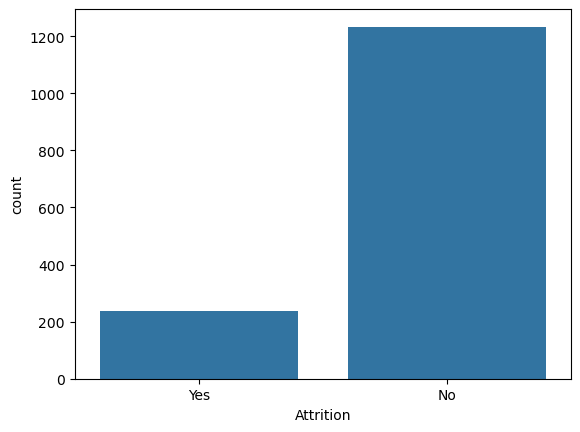

In [25]:
sns.countplot( x= df['Attrition'])

## ➡️ Attrition Rate by Key Business Dimensions

### 1. Department wise Attrition

In [26]:
pd.crosstab( df['Department'] ,df['Attrition'])

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [27]:
# normalize=True → converts counts to proportions ,unstack() → makes Yes and No separate columns

df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


### 2. Attrition by Job Roles

In [28]:
pd.crosstab( df['JobRole'] ,df['Attrition'])

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


In [29]:
df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100

Attrition,No,Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


### 3. Overtime Impact (Very Important Insight)

In [30]:
pd.crosstab( df['OverTime'] ,df['Attrition'])

Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


In [31]:
pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


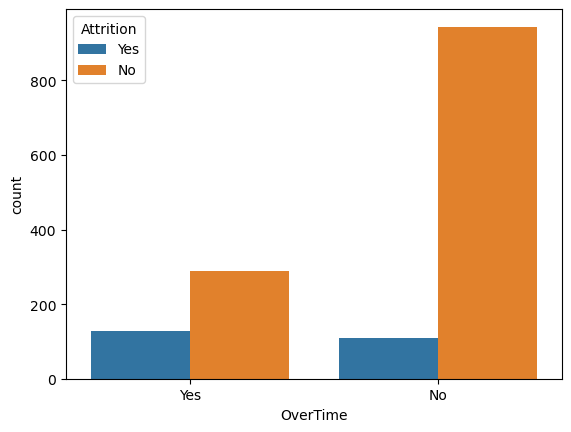

In [32]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.show()

## ➡️ Numerical vs Attrition

In [33]:
df.groupby('Attrition')['MonthlyIncome'].mean()

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

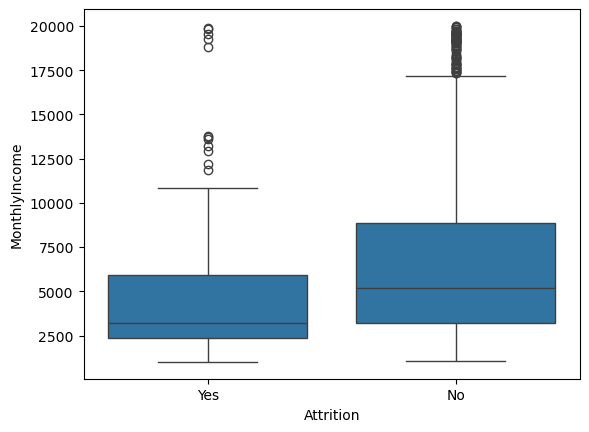

In [34]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.show()

# Employees with lower monthly income are more likely to leave, while higher-paid employees tend to stay, 
# indicating compensation as a key driver of attrition.“Although attrition is higher among lower-income employees,
# the presence of high-income outliers among leavers indicates that non-monetary factors also influence
# employee exits.”

In [35]:
df.groupby('Attrition')['Age'].mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

##  ➡️ Satisfaction Analysis

In [36]:
df.groupby('Attrition')[[
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'WorkLifeBalance',
    'RelationshipSatisfaction'
]].mean()

,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,RelationshipSatisfaction
Attrition,,,,
No,2.778589,2.771290,2.781022,2.733982
Yes,2.468354,2.464135,2.658228,2.599156


##  ➡️ Experience & Tenure Analysis

In [37]:
df.groupby('Attrition')[[
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion'
]].mean()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
Attrition,,,
No,7.369019,4.484185,2.234388
Yes,5.130802,2.902954,1.945148


##  ➡️ Income Bands

In [38]:
df['IncomeBand'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low','Mid','High','Very High'])

pd.crosstab(df['IncomeBand'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
IncomeBand,,
Low,70.731707,29.268293
Mid,85.792350,14.207650
High,89.373297,10.626703
Very High,89.673913,10.326087


In [39]:
import plotly.express as px


ct = (
    pd.crosstab(df['IncomeBand'], df['Attrition'], normalize='index') * 100
).reset_index()


# Convert to long format for Plotly
ct_melted = ct.melt(
    id_vars='IncomeBand',
    value_vars=['No', 'Yes'],
    var_name='Attrition',
    value_name='Percentage'
)


fig = px.bar(
    ct_melted,
    x='IncomeBand',
    y='Percentage',
    color='Attrition',
    text='Percentage',
    title='Attrition Percentage by Income Band',
)

fig.update_traces(texttemplate='%{text:.1f}%')

fig.show()


##  ➡️ Multivariate View

In [40]:
pd.crosstab([df['Department'], df['OverTime']],df['Attrition'],normalize='index') * 100

Attrition                               No        Yes
Department             OverTime                      
Human Resources        No        84.782609  15.217391
                       Yes       70.588235  29.411765
Research & Development No        91.449275   8.550725
                       Yes       72.693727  27.306273
Sales                  No        86.163522  13.836478
                       Yes       62.500000  37.500000

In [41]:
cts = (
    pd.crosstab([df['Department'], df['OverTime']],df['Attrition'], normalize='index') * 100
).reset_index()

cts


# Convert to long format for Plotly
cts_melted = cts.melt(
    id_vars=['Department','OverTime'],
    value_vars=['No', 'Yes'],
    var_name='Attrition',
    value_name='Percentage'
)

fig = px.bar(
    cts_melted,
    x='Department',
    y='Percentage',
    color='Attrition',
    text='Percentage',
    facet_col='OverTime',
    title='Attrition Percentage by Department and OverTime'
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')

fig.show()

# Correlation

In [42]:
corr= df[['DailyRate','DistanceFromHome','YearsWithCurrManager','YearsSinceLastPromotion','WorkLifeBalance']].corr()
corr

,DailyRate,DistanceFromHome,YearsWithCurrManager,YearsSinceLastPromotion,WorkLifeBalance
DailyRate,1.000000,-0.004985,-0.026363,-0.033229,-0.037848
DistanceFromHome,-0.004985,1.000000,0.014406,0.010029,-0.026556
YearsWithCurrManager,-0.026363,0.014406,1.000000,0.510224,0.002759
YearsSinceLastPromotion,-0.033229,0.010029,0.510224,1.000000,0.008941
WorkLifeBalance,-0.037848,-0.026556,0.002759,0.008941,1.000000


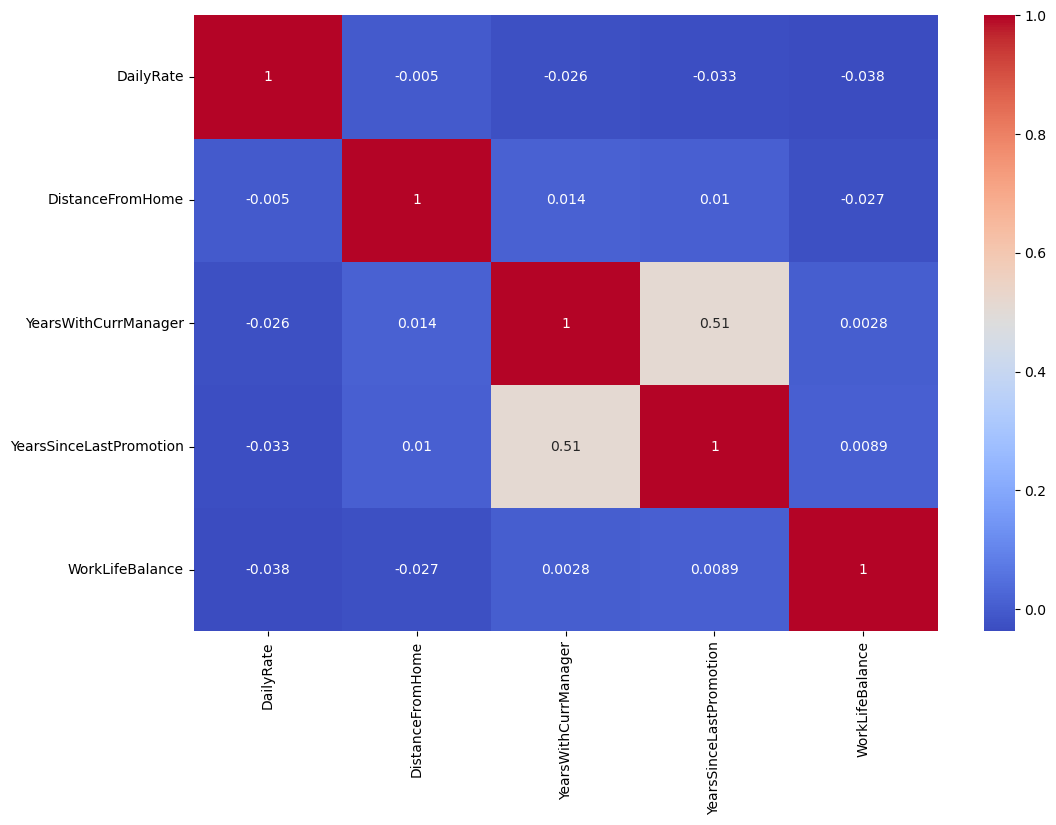

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm' , annot=True)
plt.show()

In [44]:
df.to_csv("cleaned_data.csv", index= False)

## Final EDA Summary 

 - Attrition is higher among employees working overtime.

 - Lower income and lower job satisfaction increase attrition.

 - Lower tenure (how long an employee has stayed in the company or role) employees show higher exit rates.
 
 - R&D and Sales Department show higher attrition compared to HR.